# Определение перспективного тарифа для телеком компании

План проведения работы:

Шаг 1. [Загрузить данные и изучить общую информацию](#step1)

Шаг 2. [Предобработка данных](#step2)

Шаг 3. [Исследовательский анализ данных (EDA)](#step3)

Шаг 4. [Проверка гипотез](#step4)

Шаг 5. [Общий вывод](#step5)


### Шаг 1. Загрузить данные и изучить общую информацию<a id="step1"></a>

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Прочитаем файл
df_call = pd.read_csv('calls.csv', sep = ',')

In [3]:
#Получим срез случайных строк
df_call.sample(5)

,id,call_date,duration,user_id
122640,1317_149,2018-12-10,5.87,1317
18057,1049_412,2018-10-25,0.00,1049
29867,1076_159,2018-05-13,0.00,1076
17113,1047_155,2018-12-14,0.01,1047
160431,1395_92,2018-07-03,9.95,1395


In [4]:
#Посмотрим общую информацию
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
#Прочитаем файл
df_int = pd.read_csv('internet.csv', sep = ',')

In [6]:
#Получим срез случайных строк
df_int.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
74113,74113,1250_73,443.47,2018-04-23,1250
42051,42051,1147_7,0.00,2018-07-17,1147
38227,38227,1134_282,321.62,2018-04-26,1134
104612,104612,1354_127,110.51,2018-12-02,1354
1191,1191,1005_111,432.01,2018-02-16,1005


In [7]:
#Посмотрим общую информацию
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
#Прочитаем файл
df_sms = pd.read_csv('messages.csv', sep = ',')

In [9]:
#Получим срез случайных строк
df_sms.sample(5)

,id,message_date,user_id
43238,1186_651,2018-06-21,1186
20771,1089_774,2018-03-02,1089
58234,1257_26,2018-09-13,1257
120568,1488_99,2018-11-19,1488
96219,1395_206,2018-01-25,1395


In [10]:
#Посмотрим общую информацию
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
#Прочитаем файл
df_tariffs = pd.read_csv('tariffs.csv', sep = ',')

In [12]:
#Посмотрим таблицу
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
#Прочитаем файл
df_users = pd.read_csv('users.csv', sep = ',')

In [14]:
#Получим срез случайных строк
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
110,1110,26,NaN,Петрозаводск,Матвей,Александрович,2018-05-06,smart
201,1201,32,2018-12-03,Москва,Геннадий,Веселов,2018-08-06,ultra
169,1169,52,NaN,Сочи,Георгина,Карташова,2018-06-25,smart
309,1309,28,NaN,Казань,Юлия,Касьянова,2018-10-05,ultra
271,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra


In [15]:
#Посмотрим общую информацию
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Всего 5 таблиц: 
1. "df_call" - звонки;
2. "df_int" - интернет-сессия;
3. "df_sms" - сообщения;
4. "df_tariffs" - тарифы;
5. "df_users" - информация о пользователях.

Таблица "df_call" состоит из 4 столбцов и 202607 строк. Тип данных не соответствует признаку по столбцу "call_date". В столбце "duration" видим, что длительность некоторых звонков состовляет 0.00 минут. Здесь много вариантов: пользователь не дозвонился, поставил автодозвон, передумал звонить, а может быть и набрал случайно.

Таблица "df_int" состоит из 6 столбцов и 149396 строк, один столбец без имени с номерами строк лишний. Тип данных не соответствует признаку по столбцу "session_date". В столбце "mb_used" есть нулевые значения по интернет-трафику. Есть предположение, что это случайные заходы.

Таблица "df_sms" состоит из 3 столбцов и 123036 строк. Тип данных не соответствует признаку по столбцу "message_date".

Таблица "df_users" состоит из 8 столбцов и 500 строк. Тип данных не соответствует признаку по столбцам "churn_date" и "reg_date". Большинство значений в столбце "churn_date" пропущено, на момент предоставления данных всего у 38 клиентов из 500 тариф прекратил действовать.

Таблица "df_tariffs" состоит из двух строк с описанием двух тарифных планов.

### Шаг 2. Предобработка данных<a id="step2"></a>

Подготовим таблицу "df_call" для дальнейшей работы.

In [16]:
#Переведем значения столбца "call_date" в формат даты
df_call['call_date'] = pd.to_datetime(df_call['call_date'], format = '%Y-%m-%d')

In [17]:
#Округлим значения длительности звонка вверх до целых минут
df_call['duration'] = df_call['duration'].apply(np.ceil)

In [18]:
#Посчитаем количество нулевых звонков
len(df_call[df_call['duration'] == 0])

39613

In [19]:
#Перезапишем таблицу без звонков длительностью 0.00, так как они могут повлиять на дальнейшие расчеты
df_call = df_call.query('duration != 0.0')

In [20]:
#Поменяем тип данных на целое число
df_call['duration'] = df_call['duration'].astype('int')

In [21]:
#Добавим новый столбец месяц
df_call['month'] = df_call['call_date'].dt.month

In [22]:
#создадим сводную таблицу: для каждого пользователя посчитаем количество сделанных звонков 
#и сумму израсходованных минут
df_call_pivot = df_call.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])

In [23]:
#Уберем мультииндекс, чтобы id пользователя отображалось в каждой строчке
df_call_pivot = df_call_pivot.reset_index()

In [24]:
#Уберем мультииндекс в названии столбцов
df_call_pivot.columns = ['user_id', 'month', 'sum_call', 'count_call']

In [25]:
#Посмотрим новую таблицу
df_call_pivot.head(10)

,user_id,month,sum_call,count_call
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46
5,1000,10,350,44
6,1000,11,338,37
7,1000,12,333,38
8,1001,11,430,45
9,1001,12,414,47


Подготовим таблицу "df_int" для дальнейшей работы.

In [26]:
#Удалим столбец без названия
df_int.drop(df_int.columns[df_int.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [27]:
#Проверим
df_int.head(1)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000


In [28]:
#Переведем значения столбца "call_date" в формат даты
df_int['session_date'] = pd.to_datetime(df_int['session_date'], format = '%Y-%m-%d')

In [29]:
#Округлим значения длительности звонка вверх до целых минут
df_int['mb_used'] = df_int['mb_used'].apply(np.ceil)

In [30]:
#Посчитаем количество нулевых заходов
df_int.loc[df_int['mb_used'] == 0, 'mb_used'].count()

19598

In [31]:
#Перезапишем таблицу без звонков длительностью 0.00
df_int = df_int.query('mb_used != 0.0')

In [32]:
#Поменяем тип данных на целое число
df_int['mb_used'] = df_int['mb_used'].astype('int')

In [33]:
#Добавим новый столбец месяц
df_int['month'] = df_int['session_date'].dt.month

In [34]:
#создадим сводную таблицу: для каждого пользователя посчитаем объем потраченного интернет-трафика
df_int_pivot = df_int.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [35]:
#Уберем мультииндекс, чтобы id пользователя отображалось в каждой строчке
df_int_pivot = df_int_pivot.reset_index()

In [36]:
#Посмотрим первые 10 строк новой таблицы
df_int_pivot.head(10)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


Подготовим таблицу "df_sms" для дальнейшей работы.

In [37]:
#Переведем значения столбца "message_date" в формат даты
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], format = '%Y-%m-%d')

In [38]:
#Добавим новый столбец месяц
df_sms['month'] = df_sms['message_date'].dt.month

In [39]:
#создадим сводную таблицу: для каждого пользователя посчитаем количество отправленных сообщений по месяцам
df_sms_pivot = df_sms.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')

In [40]:
#Уберем мультииндекс, чтобы id пользователя отображалось в каждой строчке
df_sms_pivot = df_sms_pivot.reset_index()

In [41]:
#Переименуем столбец
df_sms_pivot.columns = ['user_id', 'month', 'message_count']

In [42]:
#Посмотрим первые 10 строк новой таблицы
df_sms_pivot.head(10)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Подготовим таблицу "df_users" для дальнейшей работы.

In [43]:
#Переведем значения столбца "churn_date" в формат даты
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [44]:
#Переведем значения столбца "reg_date" в формат даты
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [45]:
#Сделаем новый столбец с полным именем пользователя
#Напишем функцию, которая возвращает сочетание имени и фамилии
def make_full_name(row):
    full_name = row['first_name'] + ' ' + row['last_name']
    return full_name
df_users['full_name'] = df_users.apply(make_full_name, axis = 1)

In [46]:
#Удалим столбцы 'first_name' и 'last_name'
df_users.drop(['first_name', 'last_name'], axis='columns', inplace=True)

In [47]:
#Посмотрим изменения
df_users.head(2)

,user_id,age,churn_date,city,reg_date,tariff,full_name
0,1000,52,NaT,Краснодар,2018-05-25,ultra,Рафаил Верещагин
1,1001,41,NaT,Москва,2018-11-01,smart,Иван Ежов


In [48]:
#Для наглядности поменяем столбцы местами
df_users_new = df_users[['user_id', 'full_name', 'age', 'city', 'reg_date', 'churn_date', 'tariff']]

In [49]:
#Посмотрим изменения
df_users_new.head(2)

,user_id,full_name,age,city,reg_date,churn_date,tariff
0,1000,Рафаил Верещагин,52,Краснодар,2018-05-25,NaT,ultra
1,1001,Иван Ежов,41,Москва,2018-11-01,NaT,smart


In [50]:
#Объединим таблицу "df_call_pivot" и таблицу "df_int_pivot"
call_int = df_call_pivot.merge(df_int_pivot, on = ['user_id', 'month'], how = 'outer')

In [51]:
#Объединим таблицу "call_int" и таблицу "df_sms_pivot"
call_int_sms = call_int.merge(df_sms_pivot, on = ['user_id', 'month'], how = 'outer')

In [52]:
#Посмотрим общую информацию
call_int_sms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   int64  
 1   month          3214 non-null   int64  
 2   sum_call       3168 non-null   float64
 3   count_call     3168 non-null   float64
 4   mb_used        3201 non-null   float64
 5   message_count  2717 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [53]:
#Проверим
call_int_sms.head(1)

,user_id,month,sum_call,count_call,mb_used,message_count
0,1000,5,159.0,17.0,2256.0,22.0


In [54]:
#Объединим таблицу по пользователям с таблицей с расчетами
df = df_users_new.join(call_int_sms.set_index('user_id'), on = ['user_id'], how = 'outer')

In [55]:
#Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        3216 non-null   int64         
 1   full_name      3216 non-null   object        
 2   age            3216 non-null   int64         
 3   city           3216 non-null   object        
 4   reg_date       3216 non-null   datetime64[ns]
 5   churn_date     189 non-null    datetime64[ns]
 6   tariff         3216 non-null   object        
 7   month          3214 non-null   float64       
 8   sum_call       3168 non-null   float64       
 9   count_call     3168 non-null   float64       
 10  mb_used        3201 non-null   float64       
 11  message_count  2717 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 326.6+ KB


In [56]:
#Заменим все пропущенные значения нулями
df = df.fillna(0)

In [57]:
#Посчитаем количество пользователей, которые не совершают телефонные звонки
len(df[(df['sum_call'] == 0) & (df['mb_used'] != 0)]['user_id'].unique())

10

In [58]:
#Посчитаем количество пользователей, которые не используют интернет-трафик
len(df[(df['sum_call'] != 0) & (df['mb_used'] == 0)]['user_id'].unique())

6

In [59]:
#Посчитаем количество пользователей, которые не используют сообщения
len(df[(df['message_count'] == 0) & ((df['mb_used'] != 0) | (df['sum_call'] != 0))]['user_id'].unique())

90

In [60]:
#Посмотрим на строки с пропущенными значениями в столбце 'month'
df[pd.isnull(df.month)]

,user_id,full_name,age,city,reg_date,churn_date,tariff,month,sum_call,count_call,mb_used,message_count


In [61]:
#Заменим пропущенные значения в столбце 'month'
df['month'] = df['month'].fillna(value = 12)

In [62]:
#Поменяем тип данных на целое число
df['month'] = df['month'].astype('int')
df['sum_call'] = df['sum_call'].astype('int')
df['count_call'] = df['count_call'].astype('int')
df['mb_used'] = df['mb_used'].astype('int')
df['message_count'] = df['message_count'].astype('int')

In [63]:
#Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        3216 non-null   int64         
 1   full_name      3216 non-null   object        
 2   age            3216 non-null   int64         
 3   city           3216 non-null   object        
 4   reg_date       3216 non-null   datetime64[ns]
 5   churn_date     3216 non-null   object        
 6   tariff         3216 non-null   object        
 7   month          3216 non-null   int32         
 8   sum_call       3216 non-null   int32         
 9   count_call     3216 non-null   int32         
 10  mb_used        3216 non-null   int32         
 11  message_count  3216 non-null   int32         
dtypes: datetime64[ns](1), int32(5), int64(2), object(4)
memory usage: 263.8+ KB


In [64]:
#Переименуем столбец
df_tariffs.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)

In [65]:
#Объединим общую таблицу "df" и таблицу "df_tariffs" c тарифами
df_all = df.merge(df_tariffs, on = ['tariff'], how = 'outer')

In [66]:
#Проверим
df_all.head(1)

,user_id,full_name,age,city,reg_date,churn_date,tariff,month,sum_call,count_call,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Рафаил Верещагин,52,Краснодар,2018-05-25,0,ultra,5,159,17,2256,22,1000,30720,3000,1950,150,1,1


In [67]:
#Напишем функцию, которая высчитывает помесячную выручку с каждого пользователя
def revenue(row):
    cost_call = 0
    cost_mb = 0
    cost_sms = 0
    revenue = 0
    if (row['sum_call'] - row['minutes_included']) <= 0:
        cost_call = 0
    else:
        cost_call = (row['sum_call'] - row['minutes_included']) * row['rub_per_minute']
    if (row['mb_used'] - row['mb_per_month_included']) <= 0:
        cost_mb = 0
    else:
        cost_mb = (math.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024)) * row['rub_per_gb']
    if (row['message_count'] - row['messages_included']) <= 0:
        overrun_sms = 0
    else:
        cost_sms = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    revenue = cost_call + cost_mb + cost_sms +  row['rub_monthly_fee'] 
    return revenue       

In [68]:
#Создадим новый столбец 'revenue' с результами-значениями работы функции revenue()
df_all['revenue'] = df_all.apply(revenue, axis = 1)

In [69]:
#Проверим
df_all.sample(5)

,user_id,full_name,age,city,reg_date,churn_date,tariff,month,sum_call,count_call,mb_used,message_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
2338,1296,Альфред Черный,60,Москва,2018-06-05,0,smart,10,316,32,14377,45,50,15360,500,550,200,3,3,550
1670,1149,Алиса Алексеенко,23,Мурманск,2018-05-19,0,smart,8,173,18,24704,99,50,15360,500,550,200,3,3,2697
1784,1174,Лолита Розанова,29,Санкт-Петербург,2018-02-17,0,smart,7,785,89,16423,43,50,15360,500,550,200,3,3,1805
2096,1239,Даниил Ёрохов,68,Самара,2018-06-12,0,smart,8,490,55,19310,24,50,15360,500,550,200,3,3,1350
2655,1376,Пётр Акимов,46,Самара,2018-05-31,0,smart,7,373,46,16219,0,50,15360,500,550,200,3,3,750


### Вывод

Каждую таблицу с данными подготовили к объединению. Тип данных был изменен на целое число или тип времени. Нулевые значения решено было удалить, так как эти значения могли повлиять на расчет по количеству. Были добавлен столбец с месяцем в каждую из таблиц и сделаны сводные таблицы по пользователю и по месяцам использования тарифа. Рассчитано по каждому пользователю количество и сумма звонков, количество сообщений, объем израсходованного интернет-трафика. Сводные таблицы и таблица по тарифам были объединены в одну общую для расчета ежемесячной выручки по каждому пользователю. Были найдены два пользователя, которые подключили тарифный план, но не пользовались им. Есть 10 пользователей, которые не совершают звонков, а используют только интернет и сообщения. 6 пользователей не используют интернет-трафик, используя при этом только сообщения и телефонные звонки. Так же 90 из 500 пользователей или не используют сообщения или используют не каждый месяц.

### Шаг 3. Исследовательский анализ данных (EDA)<a id="step3"></a>

In [70]:
#Сгруппируем таблицу по тарифу и посмотрим описательные статистики
df_all.groupby('tariff')[['age', 'month', 'sum_call', 'count_call', 'mb_used', 'message_count', 'revenue']].describe().T

tariff                      smart         ultra
age           count   2230.000000    986.000000
              mean      46.557848     46.838742
              std       16.349865     17.099807
              min       18.000000     18.000000
              25%       32.000000     30.000000
              50%       47.000000     45.000000
              75%       62.000000     63.000000
              max       75.000000     75.000000
month         count   2230.000000    986.000000
              mean       8.343049      8.242394
              std        2.925006      2.882305
              min        0.000000      0.000000
              25%        6.000000      6.000000
              50%        9.000000      9.000000
              75%       11.000000     11.000000
              max       12.000000     12.000000
sum_call      count   2230.000000    986.000000
              mean     417.747534    526.089249
              std      190.476754    317.887549
              min        0.000000      0.000000
              25%      282.000000    282.500000
              50%      421.500000    518.000000
              75%      545.000000    751.750000
              max     1435.000000   1673.000000
count_call    count   2230.000000    986.000000
              mean      46.926457     59.176471
              std       21.057932     35.594691
              min        0.000000      0.000000
              25%       32.000000     33.000000
              50%       47.000000     58.000000
              75%       61.000000     83.750000
              max      162.000000    190.000000
mb_used       count   2230.000000    986.000000
              mean   16221.910762  19467.137931
              std     5886.299627  10110.255401
              min        0.000000      0.000000
              25%    12645.250000  11761.000000
              50%    16529.000000  19320.000000
              75%    20068.000000  26860.250000
              max    38610.000000  49789.000000
message_count count   2230.000000    986.000000
              mean      33.369058     49.313387
              std       28.230396     47.806040
              min        0.000000      0.000000
              25%       10.000000      6.000000
              50%       28.000000     38.000000
              75%       51.000000     78.750000
              max      143.000000    224.000000
revenue       count   2230.000000    986.000000
              mean    1294.305381   2070.943205
              std      820.900496    378.629673
              min      550.000000   1950.000000
              25%      550.000000   1950.000000
              50%     1037.000000   1950.000000
              75%     1750.000000   1950.000000
              max     6770.000000   4800.000000

In [71]:
#Зададим шаг для describe и посмотрим снова статистику
percentile_head = [0.40, 0.25, 0.20, 0.15, 0.10, 0.05, 0.04, 0.02, 0.01]
percentile_tail = [0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.98]

In [72]:
#Посмотрим на значения, стремящиеся к минимуму и к максимуму по сумме израсходованных минут за месяц
df_all.groupby('tariff')[['sum_call']].describe(percentiles = percentile_head)

sum_call                                                                \
          count        mean         std  min     1%    2%     4%    5%    10%   
tariff                                                                          
smart    2230.0  417.747534  190.476754  0.0  13.58  36.0  77.16  95.0  166.0   
ultra     986.0  526.089249  317.887549  0.0   0.00   0.0   1.00  16.0   95.5   

                                                    
           15%    20%    25%    40%    50%     max  
tariff                                              
smart   213.35  252.0  282.0  369.0  421.5  1435.0  
ultra   167.75  237.0  282.5  430.0  518.0  1673.0

In [73]:
df_all.groupby('tariff')[['sum_call']].describe(percentiles = percentile_tail)

sum_call                                                            \
          count        mean         std  min    50%    65%     75%    80%   
tariff                                                                      
smart    2230.0  417.747534  190.476754  0.0  421.5  494.0  545.00  576.0   
ultra     986.0  526.089249  317.887549  0.0  518.0  643.5  751.75  808.0   

                                                 
           85%    90%      95%      98%     max  
tariff                                           
smart   611.65  658.1   726.55   802.78  1435.0  
ultra   848.50  932.0  1088.50  1233.00  1673.0

In [74]:
#Посмотрим на значения, стремящиеся к минимуму и к максимуму по количеству отправленных сообщений за месяц
df_all.groupby('tariff')[['message_count']].describe(percentiles = percentile_head)

message_count                                                           \
               count       mean        std  min   1%   2%   4%   5%  10%  15%   
tariff                                                                          
smart         2230.0  33.369058  28.230396  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
ultra          986.0  49.313387  47.806040  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                      
        20%   25%   40%   50%    max  
tariff                                
smart   6.0  10.0  21.0  28.0  143.0  
ultra   1.0   6.0  25.0  38.0  224.0

In [75]:
df_all.groupby('tariff')[['message_count']].describe(percentiles = percentile_tail)

message_count                                                      \
               count       mean        std  min   50%   65%    75%   80%   
tariff                                                                     
smart         2230.0  33.369058  28.230396  0.0  28.0  41.0  51.00  57.0   
ultra          986.0  49.313387  47.806040  0.0  38.0  58.0  78.75  88.0   

                                           
          85%    90%    95%    98%    max  
tariff                                     
smart    64.0   73.0   88.0  102.0  143.0  
ultra   101.0  122.5  145.0  171.0  224.0

In [76]:
#Посмотрим на значения, стремящиеся к минимуму и к максимуму по объему израсходованного интернет-трафика за месяц
df_all.groupby('tariff')[['mb_used']].describe(percentiles = percentile_head)

mb_used                                                             \
         count          mean           std  min       1%       2%      4%   
tariff                                                                      
smart   2230.0  16221.910762   5886.299627  0.0  1413.56  2348.58  4668.4   
ultra    986.0  19467.137931  10110.255401  0.0     0.00   917.20  2654.2   

                                                                                
             5%     10%      15%      20%       25%      40%      50%      max  
tariff                                                                          
smart   5584.15  8506.5  10487.4  11617.0  12645.25  15162.2  16529.0  38610.0  
ultra   3191.25  5979.0   8487.5  10131.0  11761.00  16559.0  19320.0  49789.0

In [77]:
df_all.groupby('tariff')[['mb_used']].describe(percentiles = percentile_tail)

mb_used                                                                \
         count          mean           std  min      50%       65%       75%   
tariff                                                                         
smart   2230.0  16221.910762   5886.299627  0.0  16529.0  18557.65  20068.00   
ultra    986.0  19467.137931  10110.255401  0.0  19320.0  23069.75  26860.25   

                                                                
            80%      85%      90%       95%       98%      max  
tariff                                                          
smart   20996.8  21909.8  23249.0  25157.05  27893.18  38610.0  
ultra   28268.0  30036.0  33004.5  37134.00  41633.50  49789.0

In [78]:
def var_ddof1(x):
    """
    Функция рассчитывает несмещенную дисперсию
    """
    return np.var(x, ddof = 1)

In [79]:
#Получим сводную таблицу по тарифам со средними значениями, дисперсией и стандартным отклонением 
#по количеству минут разговора, количеству сообщений и объему интернет-трафика
df_all.pivot_table(index = 'tariff', values = ['sum_call', 'mb_used', 'message_count', 'revenue'], aggfunc =[np.mean, var_ddof1, np.std])

mean                                            var_ddof1  \
             mb_used message_count      revenue    sum_call       mb_used   
tariff                                                                      
smart   16221.910762     33.369058  1294.305381  417.747534  3.464852e+07   
ultra   19467.137931     49.313387  2070.943205  526.089249  1.022173e+08   

                                                             std  \
       message_count        revenue       sum_call       mb_used   
tariff                                                             
smart     796.955256  673877.623614   36281.393836   5886.299627   
ultra    2285.417425  143360.429258  101052.493549  10110.255401   

                                              
       message_count     revenue    sum_call  
tariff                                        
smart      28.230396  820.900496  190.476754  
ultra      47.806040  378.629673  317.887549

C:\Users\Maxim\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


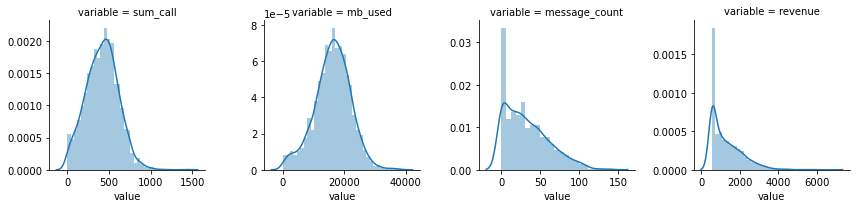

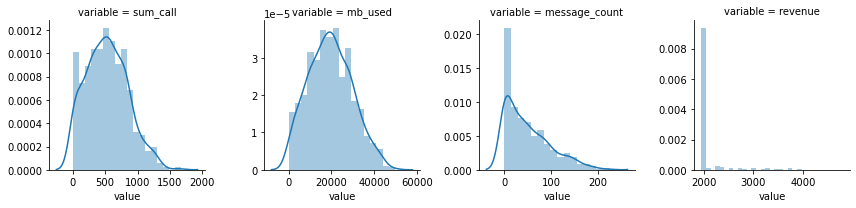

In [80]:
#Построим гистограммы распределения по плотности вероятности, напишем функцию, которая возьмет
#таблицу с указанными признаками и вернет графики построенные по этим признакам
num_features = ['sum_call', 'mb_used', 'message_count', 'revenue']
def histograms_numeric_columns(df, numerical_columns):
    f =  pd.melt(df, value_vars=numerical_columns)
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g
histograms_numeric_columns(df_all.query('tariff == "smart"'), num_features)
histograms_numeric_columns(df_all.query('tariff == "ultra"'), num_features);

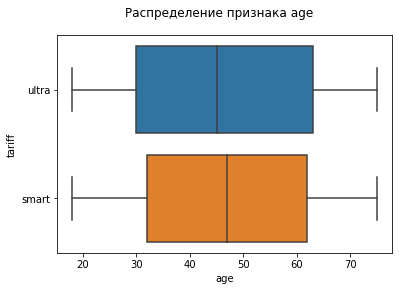

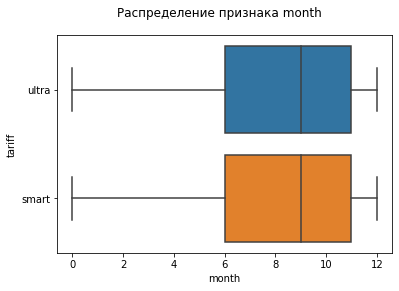

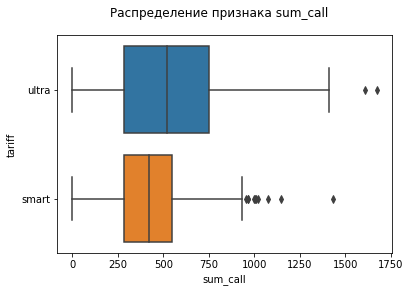

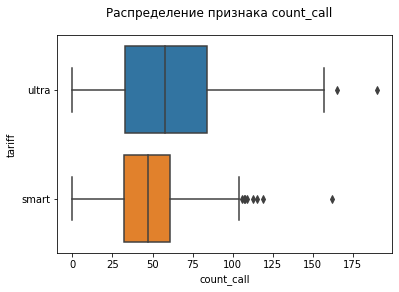

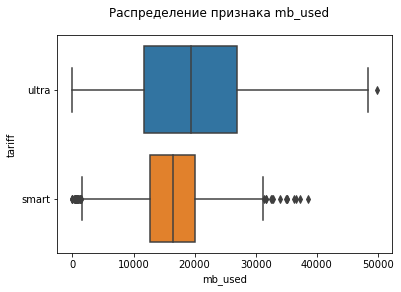

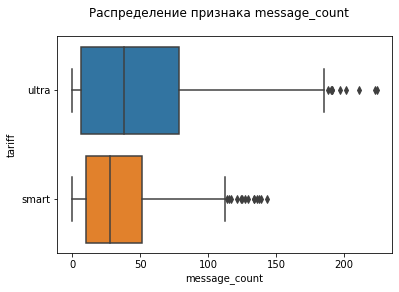

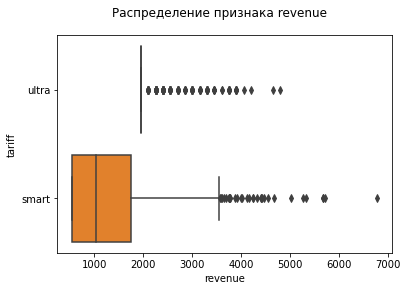

In [81]:
#Построим диаграммы размаха через цикл для числовых признаков двух тарифов
for column in ['age', 'month', 'sum_call', 'count_call', 'mb_used', 'message_count', 'revenue']:
    sns.boxplot(
        data = df_all,
        x = column,
        y = df_all['tariff']
        )
    plt.suptitle('Распределение признака ' + column)
    plt.show()

In [82]:
#Найдем коэффициенты корреляции для признаков по тарифу "Смарт"
df_all.query('tariff == "smart"')[['age', 'month', 'sum_call', 'count_call', 'mb_used', 'message_count', 'revenue']].corr()\
.style.background_gradient("RdBu_r")

,age,month,sum_call,count_call,mb_used,message_count,revenue
age,1.000000,-0.022475,0.063299,0.063889,-0.018549,0.072942,-0.006906
month,-0.022475,1.000000,0.207228,0.212043,0.239875,0.071237,0.197200
sum_call,0.063299,0.207228,1.000000,0.982267,0.342321,0.203971,0.415233
count_call,0.063889,0.212043,0.982267,1.000000,0.350704,0.206003,0.411609
mb_used,-0.018549,0.239875,0.342321,0.350704,1.000000,0.147701,0.848077
message_count,0.072942,0.071237,0.203971,0.206003,0.147701,1.000000,0.130366
revenue,-0.006906,0.197200,0.415233,0.411609,0.848077,0.130366,1.000000


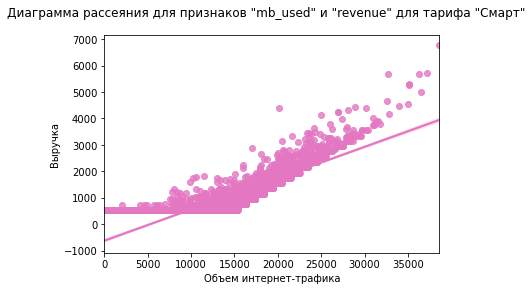

In [83]:
#Самая высокая положительная корреляция между объемом интернет-трафика и выручкой
#построим диаграмму рассеяния для тарифа "Смарт"
sns.regplot(data = df_all.query('tariff == "smart"'), x = 'mb_used', y = 'revenue', color='tab:pink')
plt.suptitle('Диаграмма рассеяния для признаков "mb_used" и "revenue" для тарифа "Смарт"')
plt.xlabel('Объем интернет-трафика')
plt.ylabel('Выручка');

In [84]:
#Найдем коэффициенты корреляции для признаков по тарифу "Ультра"
df_all.query('tariff == "ultra"')[['age', 'month', 'sum_call', 'count_call', 'mb_used', 'message_count', 'revenue']].corr()\
.style.background_gradient("RdBu_r")

,age,month,sum_call,count_call,mb_used,message_count,revenue
age,1.000000,-0.005756,0.112342,0.115203,0.003940,-0.116923,-0.080318
month,-0.005756,1.000000,0.140592,0.140861,0.144936,0.201629,0.084324
sum_call,0.112342,0.140592,1.000000,0.991712,0.180433,0.083660,0.091344
count_call,0.115203,0.140861,0.991712,1.000000,0.180476,0.085079,0.090008
mb_used,0.003940,0.144936,0.180433,0.180476,1.000000,0.175312,0.619806
message_count,-0.116923,0.201629,0.083660,0.085079,0.175312,1.000000,0.020485
revenue,-0.080318,0.084324,0.091344,0.090008,0.619806,0.020485,1.000000


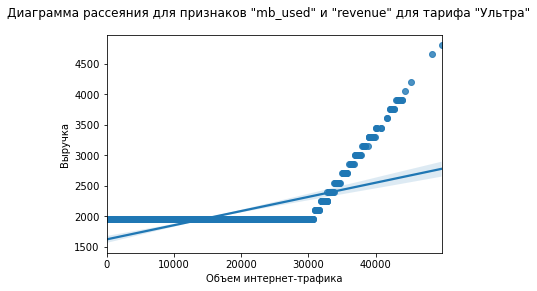

In [85]:
#Есть средняя положительная корреляция между объемом интернет-трафика и выручкой
#построим диаграмму рассеяния для тарифа "Ультра"
sns.regplot(data = df_all.query('tariff == "ultra"'), x = 'mb_used', y = 'revenue')
plt.suptitle('Диаграмма рассеяния для признаков "mb_used" и "revenue" для тарифа "Ультра"')
plt.xlabel('Объем интернет-трафика')
plt.ylabel('Выручка');

C:\Users\Maxim\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


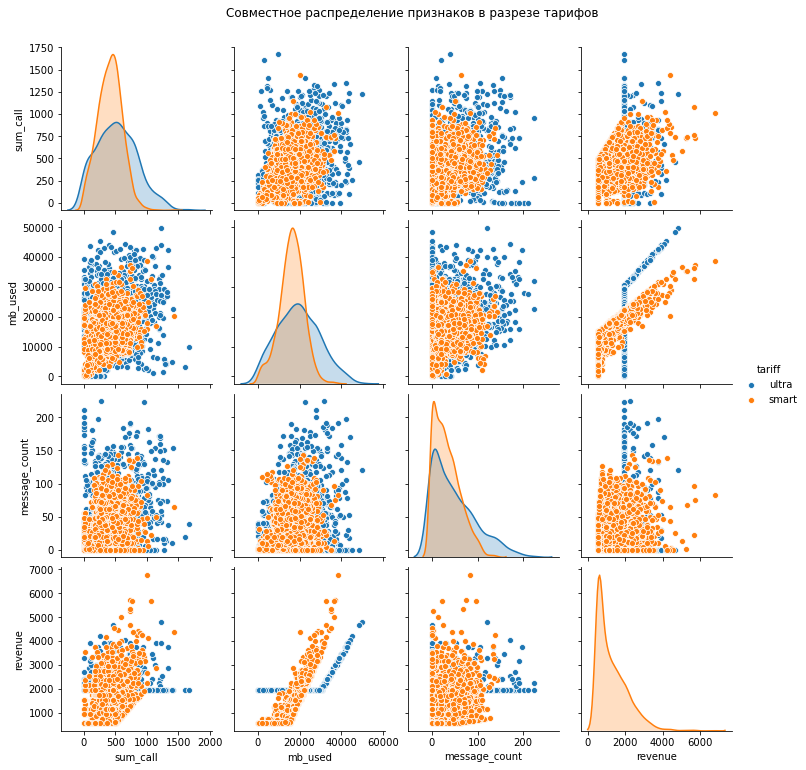

In [86]:
#Построим диаграммы совместного распределение признаков в разрезе каждого тарифа
joint_dist = df_all[['tariff', 'sum_call', 'mb_used', 'message_count', 'revenue']]
cat_features = ['tariff']
sns.pairplot(joint_dist, hue = cat_features[0])
plt.suptitle('Совместное распределение признаков в разрезе тарифов', y=1.05);

In [87]:
#Сгруппируем данные по количеству пользователей, общей сумме за год в разрезе тарифов, посчитаем доли
revenue = df_all.groupby('tariff').agg({'revenue' : ['count', 'sum']})
revenue['share_sum'] = (revenue['revenue']['sum'] * 100) / revenue['revenue']['sum'].sum()
revenue['share_count'] = (revenue['revenue']['count'] * 100) / revenue['revenue']['count'].sum()
revenue

revenue           share_sum share_count
         count      sum                       
tariff                                        
smart     2230  2886301  58.566437   69.340796
ultra      986  2041950  41.433563   30.659204

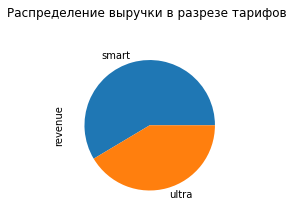

In [88]:
#Построим круговую диаграмму по сумме итоговой выручки по двум тарифам за год
df_all.groupby('tariff')['revenue'].sum().plot(kind = 'pie', y = ['revenue'], figsize = (3, 3))
plt.suptitle('Распределение выручки в разрезе тарифов', y=1.05);

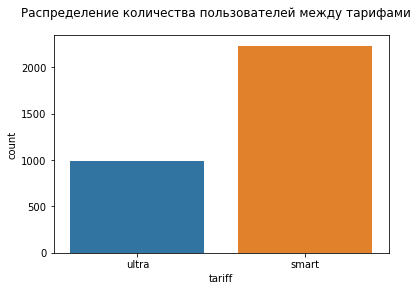

In [89]:
#Построим график сравнения количества пользователей двух тарифов
sns.countplot(df_all['tariff'])
plt.suptitle('Распределение количества пользователей между тарифами');

age


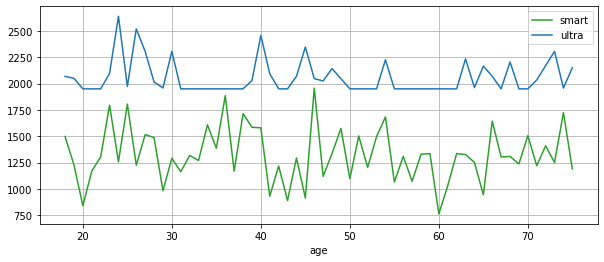

month


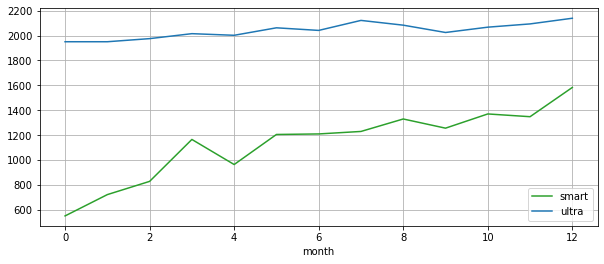

sum_call


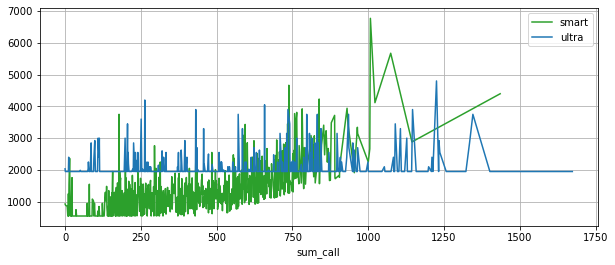

count_call


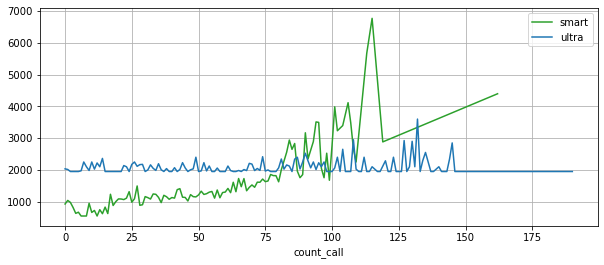

mb_used


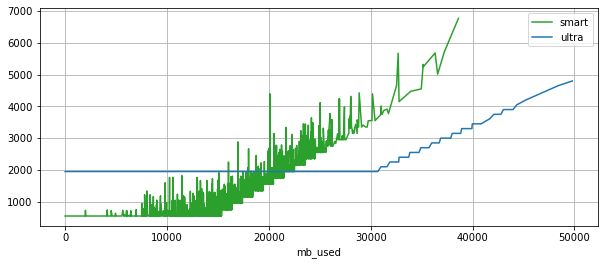

message_count


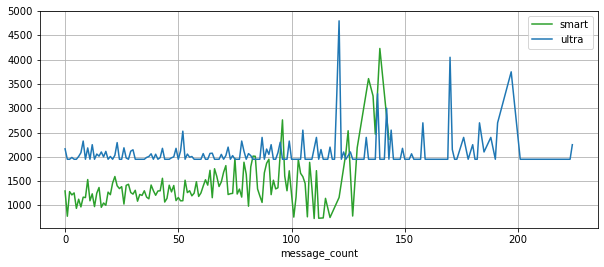

In [90]:
#Изучим зависимость выручки от других признаков, напишем цикл для построения графиков
for column in ['age', 'month', 'sum_call', 'count_call', 'mb_used', 'message_count']:
    print(column)
    ax = df_all.query('tariff == "smart"').pivot_table(
        index = column,
        values = 'revenue',
        aggfunc = 'mean').plot(grid = True, figsize = (10, 4), color='tab:green')
    df_all.query('tariff == "ultra"').pivot_table(
        index = column,
        values = 'revenue',
        aggfunc = 'mean').plot(ax = ax, grid = True, figsize = (10, 4), color='tab:blue')
    plt.legend(["smart", "ultra"])
    plt.show()

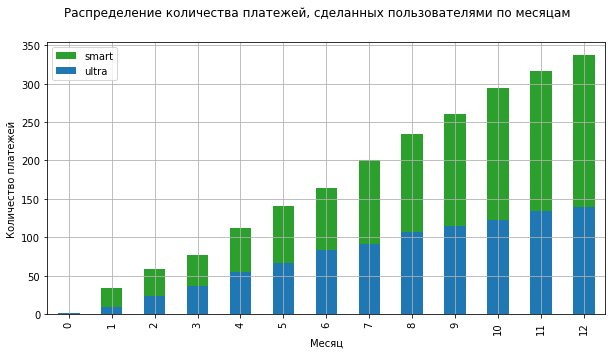

In [91]:
#Построим столбчатый график, посмотрим, как изменялось количество пользователей, которые вносили 
#платежи для каждого месяца по тарифам
ax = df_all.query('tariff == "smart"').pivot_table(
    index = 'month', values = 'revenue', aggfunc = ['median', 'count']
).plot(kind = 'bar', y = 'count', grid = True, color='tab:green', figsize =(10,5))
df_all.query('tariff == "ultra"').pivot_table(
    index = 'month', values = 'revenue', aggfunc = ['median', 'count']
).plot(kind = 'bar', y = 'count', ax =ax, grid = True, color='tab:blue', figsize =(10,5))
plt.suptitle('Распределение количества платежей, сделанных пользователями по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество платежей')
plt.legend(["smart", "ultra"]);

In [92]:
#Посмотрим как менялась выручка в числовом выражении по месяцам
pd.pivot_table(df_all, index = 'tariff', columns = 'month', values = 'revenue', aggfunc = 'sum')

month,0,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,,
smart,550,24525,48001,89676,107866,169849,198259,247014,312340,326386,402667,425803,533365
ultra,1950,17550,47400,74550,110100,138150,171450,193050,222900,232800,254250,280500,297300


### Вывод

Обычно количество израсходованных минут в месяц в тарифе "Смарт" составляет от 282 до 545 минут (в среднем 421), в тарифе "Ультра" - от 282 до 752 минут (в среднем 518). Есть пользователи, и это видно по гистограммам, которые не используют минуты разговора. Возможно, они совершают звонки из социальных сетей или других приложений. У тарифа "Ультра" таких пользователей больше. На тарифе "Ультра" в среднем на 11 звонков делают чаще и разговаривают дольше почти на 100 минут. Количество включенных в тариф минут у тарифа "Ультра" в 6 раз больше чем у "Смарт". Получается, пользователи в большинстве своем не нуждаются в таком количестве минут и используют пакет минут только на 17%. В свою очередь 35% пользователей тарифа "Смарт" приходится доплачивать за минуты разговора сверх тарифа. Стандартное отклонение от среднего по количеству израсходованных минут разговора по обоим тарифам не на много различаются, но у тарифа "Смарт" отклонение от среднего больше чем у тарифа "Ультра". Значит, что у тарифа "Смарт" больше присутствует выбросов, это также видно по диаграмме размаха. Больше пользователей готовых переплачивать за дополнительные минуты разговора. Разница между медианой и среднем по обоим тарифам не значительная. Можно сказать, что распределение значений является нормальным для количества израсходованных минут для обоих тарифов.

Ещё на предобработке данных мы выяснили, что до 90 пользователей не используют сообщения. Особенно хорошо это видно на гистограммах. В тарифе "Ультра" 20% пользователей не используют сообщения каждый месяц, в тарифе "Смарт" - 15%. Обычно количество израсходованных сообщений за месяц в тарифе "Смарт" составляет от 10 до 51 (в среднем 28), в тарифе "Ультра" - от 6 до 79 (в среднем 38). Графики скошены вправо и медианы обоих тарифов меньше своих средних, есть выбросы больших значений, но мало (диаграмма размаха). Большинство значений близки к среднему, стандартное отклонение очень маленькое. Можно сказать, что распределение значений является нормальным для количества отправленных сообщений для обоих тарифов. 1000 сообщений включенных в тариф "Ультра" пользователям, по сути, не нужны, максимальное значение по выборке составляет всего 224. В свою очередь 25% пользователей тарифа "Смарт" приходится доплачивать иногда за сообщения сверх тарифа. Большинство сообщений сейчас отправляется из социальных сетей и большое количество сообщений, включенных в тариф "Ультра" не востребованы. Зависимости от возраста пользователей и месяца использования тарифа не было обнаружено.

Проанализируем объем израсходованного интернет-трафика. Объем израсходованного интернет-трафика за месяц в тарифе "Смарт" составляет обычно от 12,35 Гб до 19,60 Гб (в среднем 16,14 Гб), в тарифе "Ультра" - от 11,50 до 26,23 (в среднем 18,87). На тарифе "Ультра" объем интернет-трафика, входящий в тариф, в два раза больше чем на тарифе "Смарт". При этом средние значения отличаются не значительно на 2,73 Гб. Практически 60% пользователей тарифа "Смарт" готовы доплачивать, и доплачивают за дополнительный объем интернет-трафика, таких пользователей у тарифа "Ультра" в среднем в месяц менее 15%. Медианы и среднее тарифов практически равны. Стандартное отклонение отличается от среднего практически в два раза по тарифу "Ультра" и по тарифу "Смарт" на 2,75. Это отслеживается по выбросам диаграммы размаха. При этом распределение значений стремится к нормальному.

Прослеживается четкая сильная зависимость между объемом интернет-трафика и выручкой по тарифу "Смарт" и слабая, но она есть, зависимость между количеством израсходованных минут и выручкой. Можно сделать вывод, что пользователи тарифа "Смарт" тратят средства сверх тарифа на интернет-трафик, но бывает и тратят на дополнительные минуты разговора. Хорошо отслеживается зависимость по диаграмме рассеяния. По тарифу "Ультра" не отслеживается зависимости между сообщениями, израсходованными минутами и выручкой, пользователи не доплачивают сверх тарифа. Есть средняя зависимость между выручкой и интернет-трафиком, то есть пользователи и таких в среднем менее 15%, которые платят за интернет-трафик сверх тарифа. Есть слабая положительная зависимость между количеством сообщений, суммой израсходованных минут и объемом интернет-трафика в тарифе "Смарт". Таким образом, есть отдельные активные пользователи всех категорий тарифного плана. В тарифе "Ультра" таких пользователей нет, зависимость не отслеживается. Тариф "Ультра" исходя из анализа звонков, сообщений и интернет-трафика в основном выбирают из-за объема интернет-трафика, который больше в два раза. Но в тоже время на тарифе "Смарт" также активно пользуются интернет-трафиком, но в итоге платят за обслуживание меньше. По сути, пакеты минут и пакеты сообщений с таком количестве как на тарифе "Ультра" не нужны.

Пользователей тарифа "Смарт" более чем в 2 раза больше чем на тарифе "Ультра". Стоимость же тарифов отличается в 3,5 раза. Исходя из этих данных выручка по тарифу "Ультра" должна быть больше, но в итоге выручка больше по тарифу "Смарт". Получается выручка сверх тарифа "Смарт" превышает выручку по ежемесячной плате по тарифу. Это отслеживается и по медианам тарифов: пользователи "Смарт" платят в два раза больше ежемесячной платы по тарифу, в свою очередь пользователи "Ультра" практически не платят сверх тарифа. Исходя из графика и сводной таблицы видно, что выручка растёт интенсивней по тарифу "Смарт". Это происходит из-за большого количества пользователей готовых платить сверх тарифа, в тоже время им не требуется такого количества минут и сообщений как на тарифе "Ультра". Пользователям выгоднее доплачивать за интернет-трафик и иногда за звонки, чем пользоваться тарифом "Ультра".

### Шаг 4. Проверка гипотез<a id="step4"></a>

1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Сформулируем нулевую гипотезу, она формулируется всегда с использованием знака равенства: средняя выручка не различается, исследуемые параметры равны. Альтернативная гипотеза: средняя выручка различается, параметры не равны. Гипотеза двухсторонняя, так как нам важно выяснить различается средняя выручка или нет, но мы не рассматриваем в какую сторону есть различия. Уровень значимости, поэтому выберем 5%, получается, по 2,5% с каждой стороны. Если статистика разности средней выручки попадет в эту зону, вероятность такого события при верной нулевой гипотезе признаем слишком малой и нулевая гипотеза отвергается. Любое распределение стремится к нормальному согласно центральной предельной теореме, будем также считать для нашего распределения и проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым выборкам, воспользуясь t-тестом.

In [93]:
alpha = 0.05
results = st.ttest_ind(
    df_all.query('tariff == "smart"')['revenue'], 
    df_all.query('tariff == "ultra"')['revenue'], 
    equal_var=False
)
print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.2414049931248708e-246
Отвергаем нулевую гипотезу


2. Средняя выручка пользователей из Москвы отличается от выручки пользователей других регионов

Проверим гипотезу по аналогии с первой. Нулевая гипотеза: средняя выручка не различается, исследуемые параметры равны. Альтернативная гипотеза: средняя выручка различается, параметры не равны. 

In [94]:
alpha = 0.05
results = st.ttest_ind(
    df_all.query('city == "Москва"')['revenue'], 
    df_all.query('tariff != "Москва"')['revenue'], 
    equal_var=False
)
print('p-значение', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.5837352906688044
Не получилось отвергнуть нулевую гипотезу


In [95]:
#Создадим новый столбец, где названия городов, которые отличные от Москвы будут заменены на "другой регион"
df_all['group_city'] = df_all['city'].where(df_all['city'] == 'Москва', 'Другой регион')

In [96]:
#сгруппируем таблицу по столбцу "group_city", расчитаем сумму выручки за год и количество пользователей
df_all.groupby('group_city').agg({'revenue' : ['count', 'sum']})

revenue         
                count      sum
group_city                    
Другой регион    2605  3980709
Москва            611   947542

In [97]:
#сделаем сводную таблицу с подсчетом числа пользователей тарифов в зависимости от значения 'group_city'
df_all.pivot_table(index = 'tariff', columns = 'group_city', values = 'user_id', aggfunc = 'count')

group_city,Другой регион,Москва
tariff,,
smart,1844,386
ultra,761,225


In [98]:
#Сгруппируем таблицу по столбцу 'group_city' и сравним описательные статистики по выручке
df_all.groupby('group_city')[['revenue']].describe().T

group_city     Другой регион       Москва
revenue count    2605.000000   611.000000
        mean     1528.103263  1550.805237
        std       810.369026   752.451347
        min       550.000000   550.000000
        25%       750.000000   798.000000
        50%      1587.000000  1750.000000
        75%      1950.000000  1950.000000
        max      6770.000000  5321.000000

### Вывод

В результате работы нулевая гипотеза о равенстве средней выручки двух генеральных совокупностей по взятым выборкам была отвергнута. Действительно, если смотреть на описательные статистики по выручке двух тарифов видно, что значения по средней выборке значительно отличаются. Выручка в среднем в разрезе месяца больше по тарифу "Ультра".

По второй гипотезе мы не смогли отвергнуть предположение, что средняя выручка одинакова как для Москвы так и для регионов.

### Шаг 5. Общий вывод<a id="step5"></a>

Проанализировав тарифы, можно сделать вывод, что в среднем по пользователям выручка по тарифу "Ультра" превышает выручку по тарифу "Смарт", но пользователей тарифа "Смарт" больше практически в два раза и они тратят в среднем в 2 раза больше сверх тарифа. В итоге годовая выручка по тарифу "Смарт" больше. Интенсивность прироста пользователей по двум тарифам устойчива, но по тарифу "Смарт" также больше. Пользователям предпочитают тариф "Смарт" и на него охотнее подключаются. По анализу видно, что среднее характеристики использования минут, сообщений и интернет-трафика пользователей близки по значениям к предложению по пакетам услуг тарифа "Смарт". И даже если пользователям необходимо доплатить за дополнительные минуты или интернет-трафик, они заплатят меньше чем ежемесячная плата по тарифу "Ультра". Поэтому если смотреть не в разрезе месяца, а в размере года тариф "Смарт" более выгоден как для компании "Меглайн" так и для пользователей. С большой долей вероятности выручка по Москве и по другим регионам стремится к равенству. При этом количество пользователей из регионов в 4 раза больше пользователей из Москвы. Исходя из этой выборочной совокупности можно сказать, что она вполне репрезентативна и может представлять всю генеральную совокупность данных.